<a href="https://colab.research.google.com/drive/1NMtL4FwaLWIUD42dFDMa_fnsUeQSJn-k?usp=drive_link" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Praktikum**
---
Tugas Praktikum: Multiple Linear Regression dengan Dataset Medical Cost Personal Datasets

**Instruksi Umum:**

1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

[insurance.csv](https://3041032130-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F5CvtE8Xh9b75jKUaRr5Y%2Fuploads%2Fm9cBZ7dbD9fZdm19VWFs%2Finsurance.csv?alt=media&token=f9e26d69-3bf9-4cd4-84d9-014eef365947)

**Tugas 1: Multiple Linear Regression**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

**Catatan Tambahan:**

* Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
* Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
* Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

**Langkah 1 — Import library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Bagian ini digunakan untuk mengimpor library yang dibutuhkan dalam analisis:

pandas → untuk mengelola data dalam bentuk tabel (DataFrame).

numpy → untuk perhitungan numerik.

matplotlib.pyplot dan seaborn → untuk membuat visualisasi grafik.

sklearn → digunakan untuk membangun model machine learning, membagi data, dan mengevaluasi hasil.

**Langkah 2 — Baca dataset**

In [ ]:
# Ganti path sesuai lokasi file kamu jika perlu
data = pd.read_csv("insurance.csv")

# Lihat 5 data pertama
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Kode ini digunakan untuk membaca file dataset insurance.csv dan menampilkan 5 baris pertama menggunakan head() agar kita bisa melihat struktur datanya (nama kolom, jenis data, dan contoh nilai).

**Langkah 3 — Cek informasi dan nilai hilang**

In [ ]:
# Informasi kolom dan tipe datanya
print(data.info())

# Mengecek nilai yang hilang
print("\nJumlah nilai hilang per kolom:")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Jumlah nilai hilang per kolom:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


data.info() → menampilkan tipe data tiap kolom dan jumlah data yang ada.

data.isnull().sum() → memeriksa apakah ada nilai kosong (missing value) dalam dataset.
Langkah ini penting untuk memastikan data bersih sebelum dianalisis.

**Langkah 4 — Deskripsi statistik dasar**

In [ ]:
# Statistik deskriptif
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Menampilkan statistik deskriptif seperti nilai rata-rata (mean), standar deviasi (std), nilai minimum, maksimum, dan kuartil.
Dengan include='all', kita bisa melihat informasi untuk kolom numerik maupun kategorikal.

**Langkah 5 — Encode variabel kategorikal**

In [ ]:
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
data_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


Model regresi hanya bisa memproses angka, jadi kolom teks (kategori) seperti sex, smoker, dan region perlu diubah menjadi angka dengan metode One-Hot Encoding.

pd.get_dummies() → mengubah kategori menjadi kolom biner (0 atau 1).

drop_first=True → menghindari multikolinearitas dengan menghapus satu kolom dummy dari tiap kategori.

**Langkah 6 — Tentukan variabel fitur (X) dan target (y)**

In [ ]:
X = data_encoded.drop(columns=['charges'])  # semua kolom kecuali charges
y = data_encoded['charges']                 # target: biaya medis

X adalah variabel independen (fitur), semua kolom yang akan digunakan untuk memprediksi.

y adalah variabel dependen (target) yaitu charges (biaya medis personal).

**Langkah 7 — Bagi data menjadi train dan test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Digunakan untuk membagi dataset menjadi dua bagian:

80% data latih (train) → untuk melatih model.

20% data uji (test) → untuk menguji kemampuan model memprediksi data baru.
random_state=42 memastikan hasil pembagian tetap sama setiap kali dijalankan.

**Langkah 8 — Buat dan latih model regresi linier**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Membuat objek model Linear Regression.

fit() digunakan untuk melatih model menggunakan data latih (X_train, y_train).

**Langkah 9 — Lakukan prediksi**

In [ ]:
y_pred = model.predict(X_test)

Setelah model dilatih, kita gunakan untuk memprediksi biaya medis pada data uji (X_test).
Hasil prediksi disimpan pada variabel y_pred.

**Langkah 10 — Evaluasi model**

In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R-squared:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R-squared: 0.7835929767120724
MSE: 33596915.85136145
RMSE: 5796.284659276273
MAE: 4181.19447375365


Digunakan untuk mengukur performa model dengan beberapa metrik:

R² (R-squared) → seberapa besar variasi target bisa dijelaskan oleh model (semakin tinggi semakin baik).

MSE (Mean Squared Error) → rata-rata kesalahan kuadrat.

RMSE → akar dari MSE, menunjukkan rata-rata jarak prediksi dari nilai sebenarnya.

MAE (Mean Absolute Error) → rata-rata kesalahan absolut.

**Langkah 11 — Lihat koefisien model**

In [ ]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print("Intercept:", model.intercept_)
coef_df

Intercept: -11931.21905032666


,Feature,Coefficient
0,age,256.975706
1,bmi,337.092552
2,children,425.278784
3,sex_male,-18.591692
4,smoker_yes,23651.128856
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354


Menampilkan koefisien regresi tiap fitur dan nilai intercept.

Koefisien positif → fitur meningkatkan nilai charges.

Koefisien negatif → fitur menurunkan nilai charges.

**Langkah 12 — Heatmap korelasi antar variabel numerik**

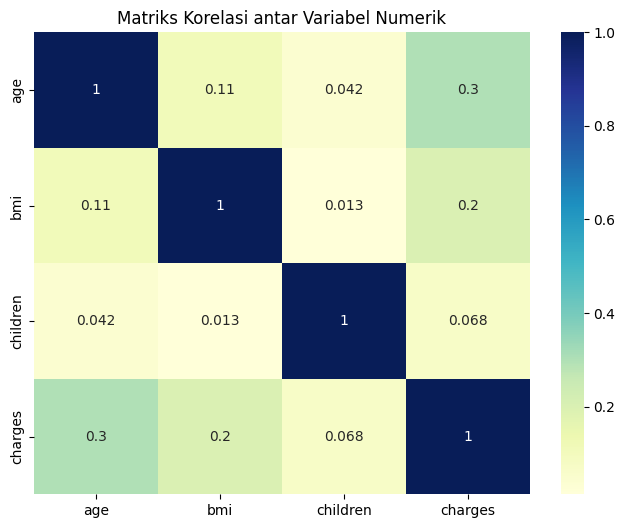

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.title("Matriks Korelasi antar Variabel Numerik")
plt.show()

Menampilkan hubungan (korelasi) antar variabel numerik menggunakan heatmap.
Semakin tinggi nilai korelasi (+1 atau -1), semakin kuat hubungan antar variabel.

**Langkah 13 — Visualisasi hasil prediksi**

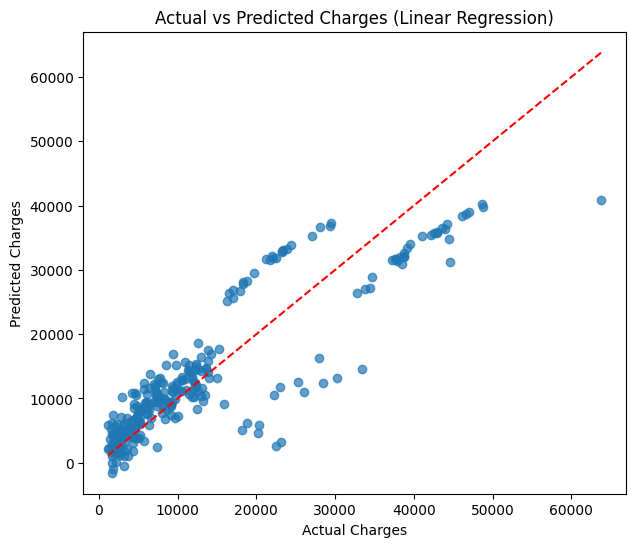

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges (Linear Regression)")
plt.show()

Menampilkan perbandingan antara nilai aktual dan nilai prediksi.
Jika model bagus, titik-titik akan berada dekat dengan garis merah diagonal (prediksi ≈ aktual).

**Langkah 14 — Plot residual**

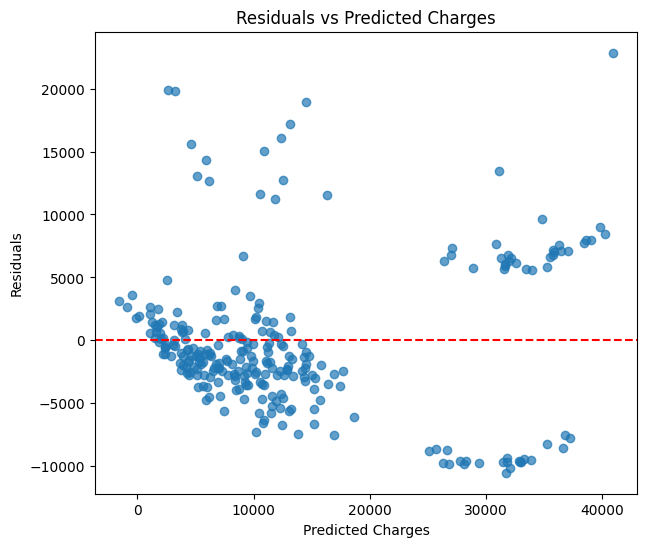

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(7,6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Charges")
plt.show()

Menampilkan residual (selisih antara aktual dan prediksi).
Jika model bagus, sebaran residual akan acak di sekitar garis 0 tanpa pola tertentu.

**Langkah 15 — Histogram residual**

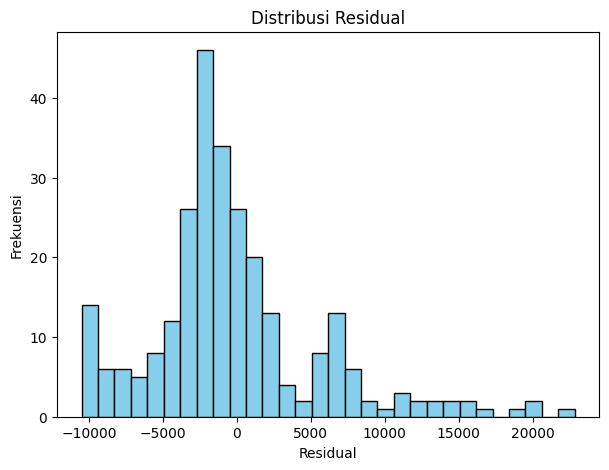

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribusi Residual")
plt.xlabel("Residual")
plt.ylabel("Frekuensi")
plt.show()

Menunjukkan distribusi dari nilai residual.
Jika model linier cocok, maka bentuk histogram akan simetris dan mendekati normal (lonceng).